In [1]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
import cv2 as cv
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop # toi uu
from keras.models import Sequential
from keras.layers import Dense # fully connected
from keras.datasets import boston_housing
from tensorflow.keras.optimizers import RMSprop # toi uu
from keras.callbacks import EarlyStopping # dung lai ngay lap tuc
from sklearn.preprocessing import scale # xu li du lieu

In [2]:
# Initialize path
path = "/kaggle/input/emotion/emotion_smalldata/train_class"

In [3]:
# Load data
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        img = np.asarray(curImg)
        img = cv2.resize(img, (60, 60))
        images.append(img)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 8
Importing Classes.....
0 1 2 3 4 5 6 7  


In [4]:
# Split data, 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

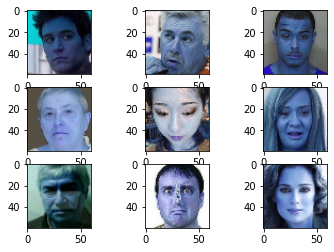

In [5]:
# predict = np.array(predict)
for i in range(0,9):
    plt.subplot(330+i+1)
    plt.imshow(X_train[i])  
plt.show()

In [6]:
# Preprocessing
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)     
    img = img/255            
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [7]:
# Reshape data
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [8]:
# Create Generator for preprocessing data
dataGen= ImageDataGenerator(width_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)

In [9]:
# Convert label 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [10]:
# Create model 
no_Of_Filters=64
size_of_Filter=(5,5)
                     
size_of_Filter2=(3,3)
size_of_pool=(2,2)  

model= Sequential()
model.add((Conv2D(64,(5,5),input_shape=(60,60,1),activation='relu')))  
model.add((Conv2D(64, (5,5), activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add((Conv2D(32, (3,3),activation='relu')))
model.add((Conv2D(32,(3,3), activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(8,activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 52, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0

2022-12-06 09:17:07.029273: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
# Compile Model
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
# Training model 
history=model.fit(dataGen.flow(X_train,y_train,batch_size=10),epochs=10,validation_data=(X_validation,y_validation),shuffle=1)

Epoch 1/10


2022-12-06 09:17:07.338085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


35/35 [==============================] - 8s 205ms/step - loss: 2.1071 - accuracy: 0.1304 - val_loss: 2.0820 - val_accuracy: 0.1724
Epoch 2/10
35/35 [==============================] - 7s 196ms/step - loss: 2.0801 - accuracy: 0.1507 - val_loss: 2.0826 - val_accuracy: 0.0920
Epoch 3/10
35/35 [==============================] - 7s 197ms/step - loss: 2.0814 - accuracy: 0.1188 - val_loss: 2.0861 - val_accuracy: 0.1494
Epoch 4/10
35/35 [==============================] - 7s 194ms/step - loss: 2.0844 - accuracy: 0.1246 - val_loss: 2.0889 - val_accuracy: 0.1034
Epoch 5/10
35/35 [==============================] - 7s 197ms/step - loss: 2.0833 - accuracy: 0.1449 - val_loss: 2.1067 - val_accuracy: 0.1609
Epoch 6/10
35/35 [==============================] - 7s 206ms/step - loss: 2.0717 - accuracy: 0.1188 - val_loss: 2.2096 - val_accuracy: 0.1264
Epoch 7/10
35/35 [==============================] - 7s 200ms/step - loss: 2.0550 - accuracy: 0.2000 - val_loss: 2.0839 - val_accuracy: 0.1034
Epoch 8/10
35/35 

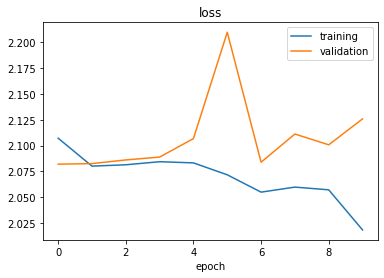

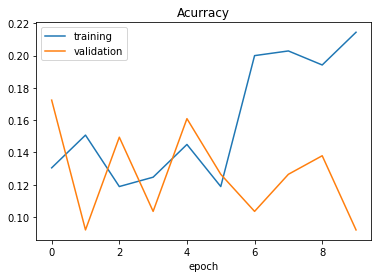

Test Score: 2.1238484382629395
Test Accuracy: 0.12962962687015533


In [12]:
# Plot
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [13]:
# Save model
from tensorflow.keras.models import load_model
model.save('emotion.h5')
model_ANN = load_model('/kaggle/input/emotion2/emotion.h5')

(1, 60, 60, 1)
(1, 60, 60, 1)
(1, 60, 60, 1)
(1, 60, 60, 1)
(1, 60, 60, 1)
(1, 60, 60, 1)
(1, 60, 60, 1)
(1, 60, 60, 1)
(1, 60, 60, 1)


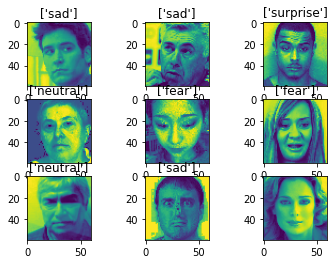

In [14]:
from tensorflow.keras.utils import load_img, img_to_array

# See 9 image in data
for i in range(0,9): 
    predict = ['neutral','happy','sad','surprise','fear','sad','anger','fear']
    predict = np.array(predict)
    img = img_to_array(X_test[i])
    img = img.reshape(1,60,60,1)
    
    print(img.shape)
    result = np.argmax(model_ANN.predict(img),axis=-1)
    predict[result]
    plt.title(predict[result])
    plt.subplot(330+i+1)
    plt.imshow(X_train[i])
plt.show()

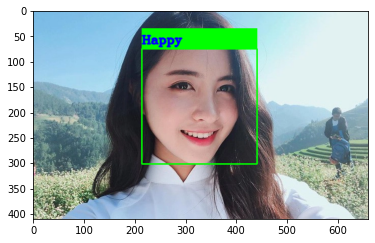

In [15]:
# Detect and Classify objects on picture
def xuli(img):

    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = img.astype(np.float64)/255
    return img

def get(classNo):
    if   classNo == 0: return 'Neutral'
    elif classNo == 1: return 'Happy'
    elif classNo == 2: return 'Sad'
    elif classNo == 3: return 'Surprise'
    elif classNo == 4: return 'Fear'
    elif classNo == 5: return 'Sad'
    elif classNo == 6: return 'Anger'
    elif classNo == 7: return 'Fear'

face_cascade = cv.CascadeClassifier()
face_cascade.load('/kaggle/input/emotion2/haarcascade_frontalface_default.xml')

model = load_model('/kaggle/input/emotion2/emotion.h5')
frame = cv.imread('/kaggle/input/anhcamxuc2/1.jpg', cv.IMREAD_COLOR)
frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

face = face_cascade.detectMultiScale(frame)
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
for (x,y,w,h) in face:
    # cv.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),1)
    try:
        roi = frame[y-int(h/10):y+h+int(h/15),x-int(w/15):x+w+int(h/15)]
        roi = np.asarray(roi)
        cv.rectangle(frame, (x,y), (x+w,y+h), (0,255,0),2)
        
        

        roi = cv.resize(roi,(60,60))
        roi = xuli(roi)
        roi = roi.reshape(1,60,60,1)


        predict = ['0','1','2','3','4','5','6','7','8','9','10','11','12']
        predict = np.array(predict)
        result = np.argmax(model.predict(roi),axis=-1)
        # text = predict[result]
        result = int(result)
        
        text = get(result)

        # text = predict[result]
        text = str(text)
        if result == 0 or result == 1 or result ==3:
            cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            cv.rectangle(frame, (x,y-40),(x+w, y), (0,255,0),-2)
            cv.putText(frame, str(get(result)),(x,y-10), cv.FONT_HERSHEY_COMPLEX, 0.75, (0,0,255),2, cv2.LINE_AA)
        # cv.putText(frame,text,(x-int(w/10),y-int(h/10)),cv.FONT_HERSHEY_DUPLEX,0.5,(0,0,255),1)
        else: 
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,255),2)
            cv2.rectangle(frame, (x,y-40),(x+w, y), (255,0,255),-2)
            cv2.putText(frame, str(get(result)),(x,y-10), cv.FONT_HERSHEY_COMPLEX, 0.75, (0,0,0),2, cv2.LINE_AA)
    except Exception as e:
        print(str(e))

plt.imshow(frame)
plt.show()